In [236]:
import pandas as pd
import numpy as np
import re
%matplotlib inline

In [237]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing

In [238]:
col_names = ['S/N', 'ID', 'Gender', 'Age', 'Apply_date', 'Sup_date', 'Doc_type', 'Times', 'Pass', 
                 'Num_of_people', 'Relationship', 'Degree', 'Num_of_years', 'Job', 'Base_salary', 
                 'Gross_salary', 'Outcome', 'Date', 'Remark', 'Comments']

def load_sheet(year, col_names):
    df = pd.read_excel("spr.xls", skiprows=1, sheetname=str(year), names=col_names)
    df = df.dropna(thresh=10)
    return df

# load_sheet(2015, col_names)

In [239]:
data = []
for year in range(2012, 2017):
    df = load_sheet(year, col_names)    
    data.append(df)

In [240]:
df = pd.concat(data, axis=0)
df = df.reset_index()
df.shape

(992, 21)

In [241]:
df.head()

,index,S/N,ID,Gender,Age,Apply_date,Sup_date,Doc_type,Times,Pass,...,Relationship,Degree,Num_of_years,Job,Base_salary,Gross_salary,Outcome,Date,Remark,Comments
0,1,1,Lucky,F,23,2012-10-01 00:00:00,2012-12-07 00:00:00,????,1st Time,EP,...,Independent,Poly,4Y,Assistant Manager,2200,3000,Approved,2013-02-27 00:00:00,"??27???,28????,3?1????,??????",NaN
1,2,2,Emma,F,27,2012-10-01 00:00:00,2012-11-09 00:00:00,????,1st Time,SP,...,Independent,Bachelor,6Y+,Customer Service,2710,2710,Approved,2013-04-05 00:00:00,11?9? ????? ?4?5???? 4?9????:),NaN
2,3,3,??,F,23,2013-10-02 00:00:00,N.A.,NaN,1st Time,SP,...,Independent,Poly,4Y,CC,2000,2000,Approved,2013-05-27 00:00:00,NaN,NaN
3,4,4,Monica,F,24,2012-10-04 00:00:00,N.A.,NaN,1st Time,SP,...,Independent,Poly,6Y,Sales Engineer,2000,2000,Approved,2013-04-16 00:00:00,NaN,NaN
4,5,5,Mina,F,27,2012-10-05 00:00:00,2012-11-25 00:00:00,Parents CV,2nd Time,EP,...,Independent,Master,4Y,NaN,3000,3000,Approved,2013-03-25 00:00:00,NaN,NaN


In [242]:
original_df = df.copy()

In [243]:
#only look at independent applications
df = original_df[original_df.Relationship.str.contains('\w*[Ii]nde|Indiv', regex=True) == True]
df.shape

(488, 21)

In [244]:
# df = df.dropna(subset=['Gender', 'Age', 'Pass', 'Base_salary', 
#                  'Gross_salary'])
# df.shape                

In [245]:
def get_year(s):
    s = s.strip()
    year_match = re.match('(?P<year>\d+\.?\d*)[Yy\W+]', s)
    if year_match is not None:
        return int(round(float(year_match.group('year'))))
    else:
        return 1

In [246]:
df['Num_of_years'] = df['Num_of_years'].apply(lambda x: get_year(str(x)))
df.Num_of_years.unique()

/home/wx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([ 4,  6, 10,  3,  2,  1,  9,  5,  7,  8, 11, 16, 14, 12])

In [247]:
def convert_times(s):
    try:
        s = s.strip()
        return int(s[0])
    except:
        return 1

In [248]:
df.Times = df.Times.apply(lambda x: convert_times(x))
df.Times.unique()

array([1, 2, 4, 3, 5])

In [249]:
def get_gender(s):
    try:
        if 'f' in s or 'F' in s:
            return 'F'
        else:
            return 'M'
    except:
        return np.nan

In [250]:
df.Gender = df.Gender.apply(lambda x: get_gender(x))
df.Gender.unique()

array(['F', 'M', nan], dtype=object)

In [251]:
df.Age = df.Age.apply(lambda x: float(x))

In [252]:
def get_pass(s):
    try:
        s = s.lower()
        if 'e' in s or 'p2' in s:
            return 'EP'
        if 'sp' in s:
            return 'SP'
        if 'wp' in s:
            return 'WP'
        return np.nan
    except:
        return np.nan

In [253]:
df.Pass = df.Pass.apply(lambda x: get_pass(x))
df.Pass.unique()

array(['EP', 'SP', nan, 'WP'], dtype=object)

In [254]:
def get_degree(s):
    try:
        s = s.lower()
        if 'phd' in s:
            return 'PhD'
        if 'master' in s:
            return 'Master'
        if 'bachel' in s:
            return 'Bachelor'
        if 'poly' in s or 'diploma' in s:
            return 'Poly'
    except AttributeError:
        return np.nan

In [255]:
df.Degree = df.Degree.apply(lambda x: get_degree(x))
df.Degree.unique()

array(['Poly', 'Bachelor', 'Master', nan, None, 'PhD'], dtype=object)

In [256]:
def get_salary(s):
    if s :
        return np.nan
    try:        
        s = s.replace('$', '').replace(',', '').replace('S', '')
        return int(s)
    except:    
        return int(s)

In [257]:
original_df.Base_salary.replace(to_replace='$|,|', value='', regex=True).unique()

array([2200, 2710, 2000, 3000, 8000, 12000, 2900, 5200, 3700, 4100, 2400,
       1900, 6400, 5000, 3500, 1000, 6500, 2150, 2550, 6900, 0, nan, 5500,
       3900, 4750, 10000, 2300, 5600, 2800, 7400, 800, 3300, 1500, 4700,
       2500, 3400, 3600, 3200, 5100, 4000, 3100, 2600, 3800, 1950, 4680,
       6000, 1700, 3250, 4500, 1400, 4600, u'$2000', 1980, 48000, 36000,
       2520, 3220, 4300, 4200, 4800, 3540, 3950, 2100, 5250, 7500, 5800,
       8700, 2425, u'N.A.', 8200, 1600, 7600, 1800, 3670, 2031, 2131, 3275,
       2950, 3550, 2225, 3235, 6650, 2050, 8500, 9450, 3760, 5704, 1300,
       5300, 2350, 5900, 3311, u'$8000\xa0', 1250, 5700, 3050, 2704, 4400,
       6300, 20000, u'-', 2700, 5350, 3850, 3620, 4050, 1750, 6200, 3260,
       15000, 6450, 3350, 1650, 3617, u'S$2200', 2250, 7000, 9000, 4900,
       2120, 2650, 3566, 3150, 16000, 2750, 6800, 3680, 3450, 2160, 1200,
       2850, 2010, 4350, u'$5000+', 7800, 3770, 7860, 7100, 8900, 4150,
       9150, 3740, 4850, 2730, 5400, 5960.

In [258]:
def get_salary(s):
    s = str(s).strip().replace(',', '')
    number_match = re.search('(?P<salary>\d+,?\d+)', s)
    if number_match is not None:
        return float((number_match.group('salary')))
    else:
        return np.nan

In [259]:
df.Base_salary = df.Base_salary.apply(lambda x: get_salary(x))
df.Gross_salary = df.Gross_salary.apply(lambda x: get_salary(x))

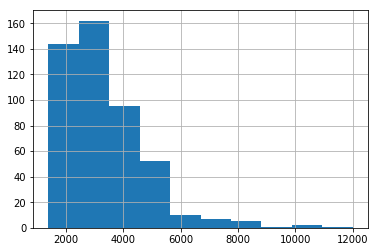

In [260]:
df.Base_salary.hist()

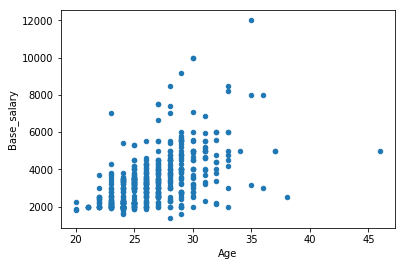

In [261]:
df.plot(x='Age', y='Base_salary', kind='scatter', )

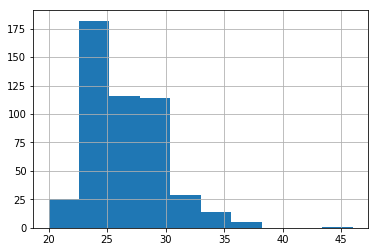

In [262]:
df.Age.hist()

In [263]:
df.Outcome = df.Outcome.str.strip().str.lower()
df.Outcome.unique()

array([u'approved', u'rejected', u'pending', u'appeal', nan], dtype=object)

In [271]:
features = ['Gender', 'Age', 'Times', 'Pass', 'Degree', 'Num_of_years', 'Base_salary'
                 , 'Gross_salary']

In [266]:
df = df[df.Outcome.isin(['approved', 'rejected'])]
df = df[features + ['Outcome']]
df.shape

(283, 9)

In [268]:
df_encode = df.copy()

In [269]:
le = preprocessing.LabelEncoder()
df_encode.Outcome = le.fit_transform(df.Outcome)

In [270]:
df_encode.head()

,Gender,Age,Times,Pass,Degree,Num_of_years,Base_salary,Gross_salary,Outcome
0,F,23.0,1,EP,Poly,4,2200.0,3000.0,0
1,F,27.0,1,SP,Bachelor,6,2710.0,2710.0,0
2,F,23.0,1,SP,Poly,4,2000.0,2000.0,0
3,F,24.0,1,SP,Poly,6,2000.0,2000.0,0
4,F,27.0,2,EP,Master,4,3000.0,3000.0,0


In [273]:
df_encode = pd.get_dummies(df_encode)
df_encode.columns

Index([u'Age', u'Times', u'Num_of_years', u'Base_salary', u'Gross_salary',
       u'Outcome', u'Gender_F', u'Gender_M', u'Pass_EP', u'Pass_SP',
       u'Degree_Bachelor', u'Degree_Master', u'Degree_PhD', u'Degree_Poly'],
      dtype='object')

In [274]:
df_encode.Outcome.value_counts()
# approve - 0
# reject - 1

0    179
1    104
Name: Outcome, dtype: int64

In [280]:
# fill NA
df_encode = df_encode.fillna(df_encode.mean())

In [281]:
train_X, test_X, train_y, test_y = train_test_split(df_encode.drop('Outcome', axis=1), df_encode['Outcome'],
                                                    test_size=0.2, stratify=df_encode['Outcome'])
train_X.shape, test_X.shape

((226, 13), (57, 13))

In [288]:
clf = tree.DecisionTreeClassifier(max_depth=5, class_weight='balanced')
# clf = tree.DecisionTreeClassifier(max_depth=7)

clf = clf.fit(train_X, train_y)

In [289]:
y_pred = clf.predict(test_X)
print accuracy_score(test_y, y_pred)
confusion_matrix(test_y, y_pred)

0.771929824561


array([[26, 10],
       [ 3, 18]])

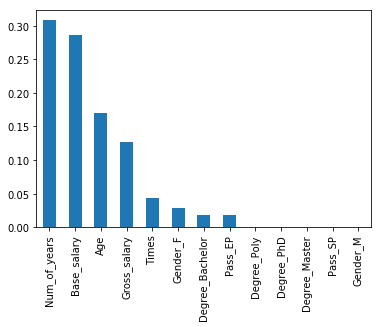

In [290]:
feature_importances = pd.Series(clf.feature_importances_, index=train_X.columns)
feature_importances.sort_values(ascending=False).plot(kind = "bar")

# sorted(zip(train_X.columns, clf.feature_importances_), key=lambda x: x[1], reverse=True)

In [291]:
with open('pr.dot', 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=train_X.columns,
                                class_names=['Approve', 'Reject'], filled=True, rounded=True)

In [292]:
!dot -Tpdf pr.dot -o pr_new.pdf

/bin/sh: 1: dot: not found


In [293]:
from sklearn.linear_model import LogisticRegression

In [295]:
lr_model = LogisticRegression()
lr_model.fit(train_X, train_y)

y_pred = lr_model.predict(test_X)
print accuracy_score(test_y, y_pred)
confusion_matrix(test_y, y_pred)

0.771929824561


array([[28,  8],
       [ 5, 16]])

In [296]:
lr_model.coef_

array([[  8.15068481e-02,  -5.44163474e-02,  -3.16257165e-01,
         -4.48485380e-04,   3.82390930e-04,  -3.23350142e-01,
         -2.65061255e-01,  -3.99616523e-01,   3.17546585e-02,
          2.93149836e-01,   8.20469196e-01,   3.93937337e-02,
         -1.32742200e+00]])

In [297]:
lr_model.intercept_

array([-0.44903194])